In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the file path to the CSV file in Google Drive
file_path = '/content/drive/MyDrive/704test2/sorted_data.csv'  # Replace with your actual file path

# Read the CSV file into a DataFrame
sorted_df = pd.read_csv(file_path)

# Now, 'sorted_df' contains the data from the CSV file


In [4]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Task_Type       1960 non-null   object 
 1   Target_Freq     1960 non-null   float64
 2   Adj_Freq        1960 non-null   float64
 3   target_octaves  1960 non-null   float64
 4   adj_octaves     1960 non-null   float64
 5   week            1960 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 92.0+ KB


In [5]:

unique_counts = sorted_df['week'].value_counts()

print(unique_counts)

10    315
7     280
11    280
8     245
12    210
14    210
6     140
9     140
13    140
Name: week, dtype: int64


In [6]:
# Filter the DataFrame for week == 6
filtered_df = sorted_df[sorted_df['week'] == 10]

# Calculate unique value counts for 'Task_Type' in the filtered DataFrame
unique_counts = filtered_df['Task_Type'].value_counts()

# Print the unique value counts
print(unique_counts)


pitch_matching_assess_unaided                63
pitch_matching_asssess_unaided_as_control    63
pitch_matching_assess_aided                  63
pitch_matching_both_ears_desktop_speaker     63
pitch_matching_double_aided                  63
Name: Task_Type, dtype: int64


In [7]:
# Create a dictionary to map the values
task_type_mapping = {
    'pitch_matching_both_ears_desktop_speaker': 'ref(CI + unaided) , adj(unaided)',
    'pitch_matching_double_aided': 'ref(CI) , adj(CI)',
    'pitch_matching_assess_aided': 'ref(unaided) , adj(CI)',
    'pitch_matching_assess_unaided': 'ref(CI) , adj(unaided)',
    'pitch_matching_asssess_unaided_as_control': 'ref(CI) control , adj(unaided) control'
}

# Replace the values in the 'Task_Type' column using the mapping dictionary
sorted_df['Task_Type'] = sorted_df['Task_Type'].replace(task_type_mapping)


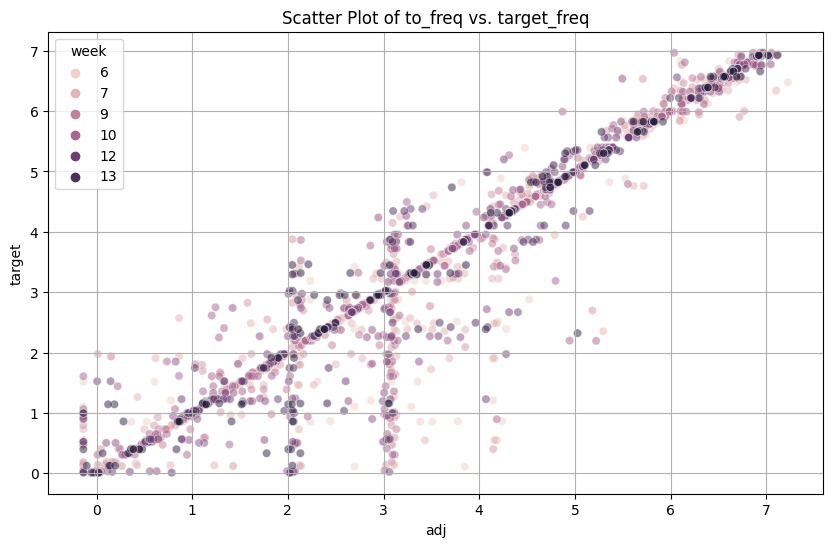

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 'to_freq' and 'target_freq' columns
adj_octaves = sorted_df['adj_octaves']
target_octaves = sorted_df['target_octaves']

# Add the 'week' column for hue
week = sorted_df['week']

# Create a scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x=adj_octaves, y=target_octaves, hue=week, alpha=0.5)
plt.title('Scatter Plot of to_freq vs. target_freq')
plt.xlabel('adj')
plt.ylabel('target')
plt.grid(True)
plt.show()

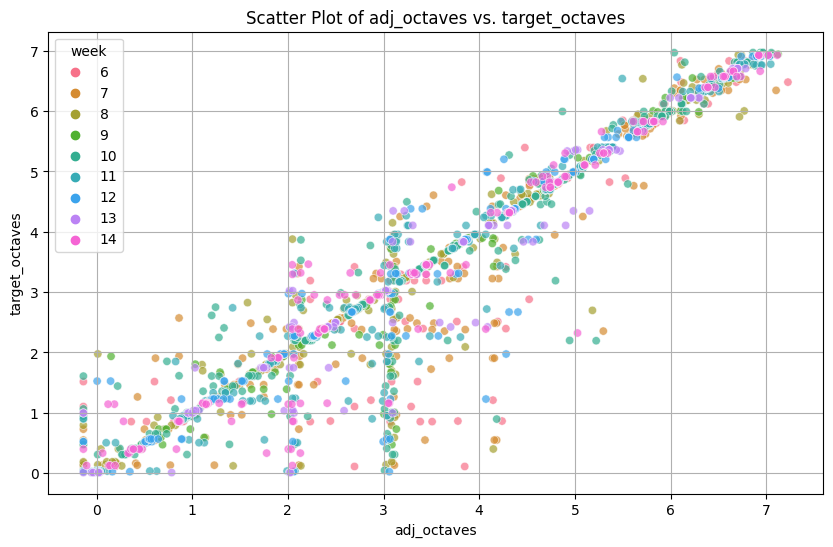

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for vibrant colors
custom_palette = sns.color_palette("husl", n_colors=len(sorted_df['week'].unique()))

# Extract the 'adj_octaves' and 'target_octaves' columns
adj_octaves = sorted_df['adj_octaves']
target_octaves = sorted_df['target_octaves']

# Create a scatter plot with the custom palette and style
plt.figure(figsize=(10, 6))
sns.scatterplot(x=adj_octaves, y=target_octaves, hue=sorted_df['week'], palette=custom_palette, alpha=0.7)
plt.title('Scatter Plot of adj_octaves vs. target_octaves')
plt.xlabel('adj_octaves')
plt.ylabel('target_octaves')

plt.grid(True)
plt.show()


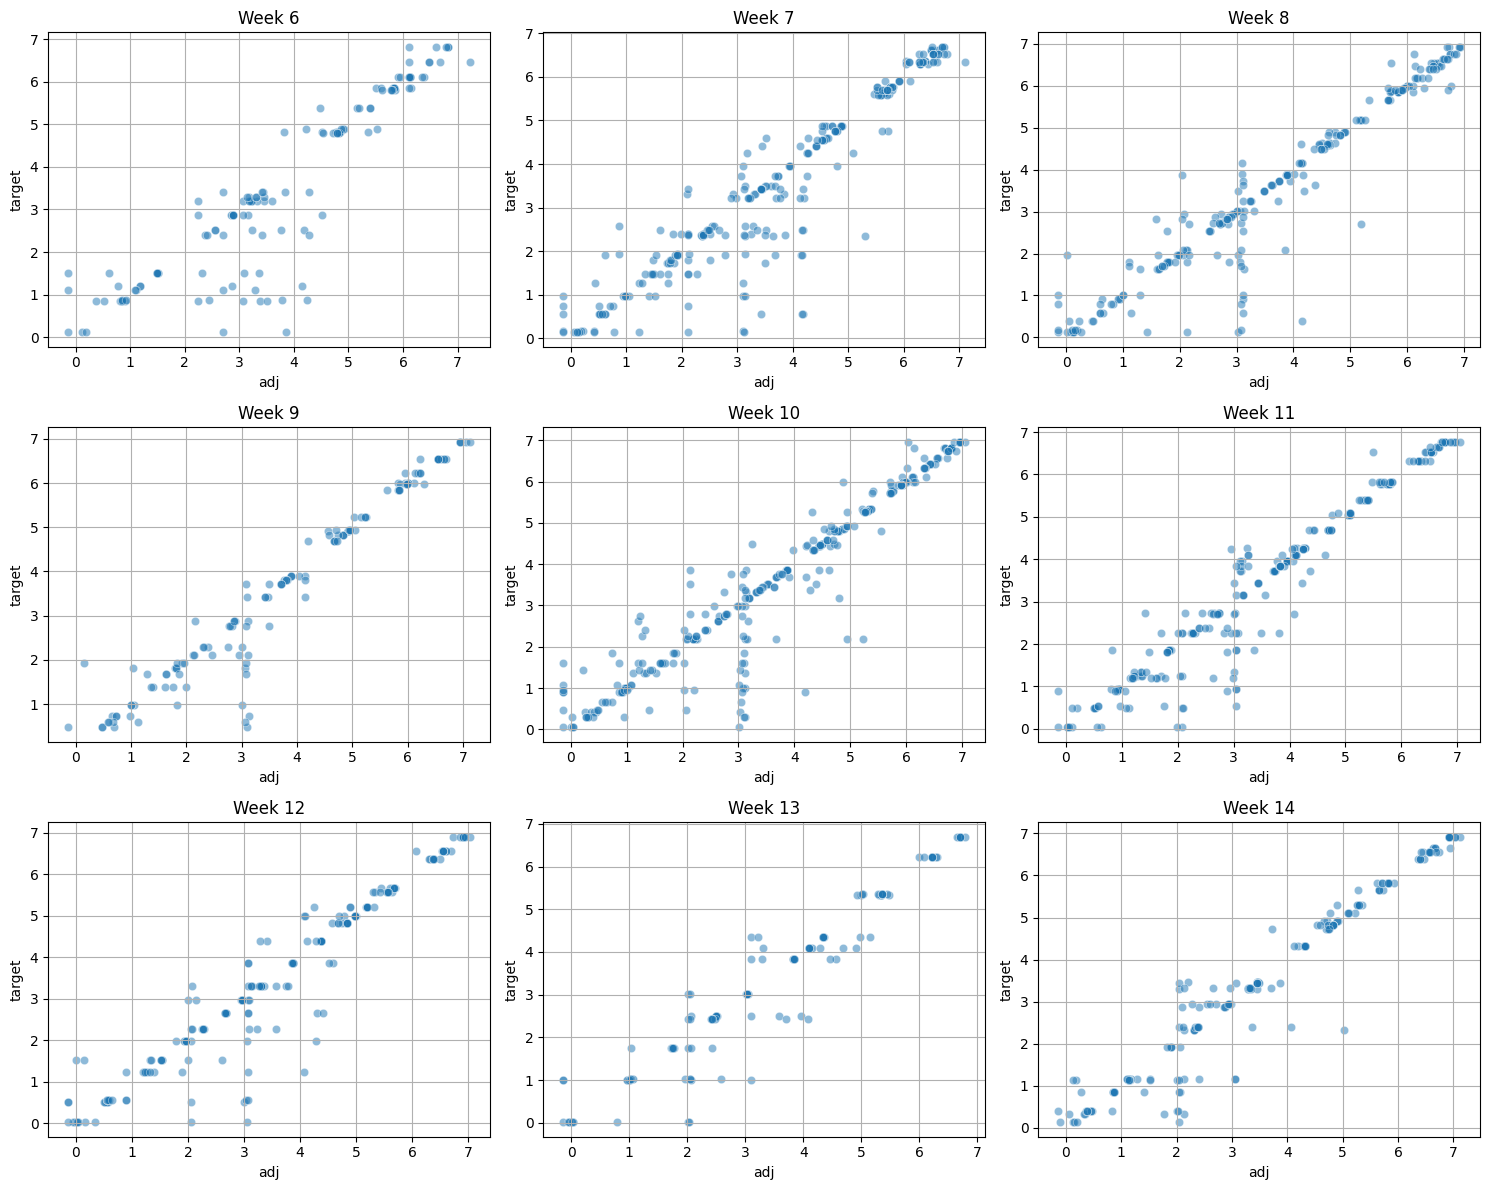

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique weeks in the DataFrame
unique_weeks = sorted_df['week'].unique()

# Create a scatter plot for each week
plt.figure(figsize=(15, 12))  # Adjust the figure size as needed

for i, week in enumerate(unique_weeks, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    data = sorted_df[sorted_df['week'] == week]

    sns.scatterplot(x='adj_octaves', y='target_octaves', data=data, alpha=0.5)
    plt.title(f'Week {week}')
    plt.xlabel('adj')
    plt.ylabel('target')
    plt.grid(True)

plt.tight_layout()  # Ensure subplots don't overlap
plt.show()


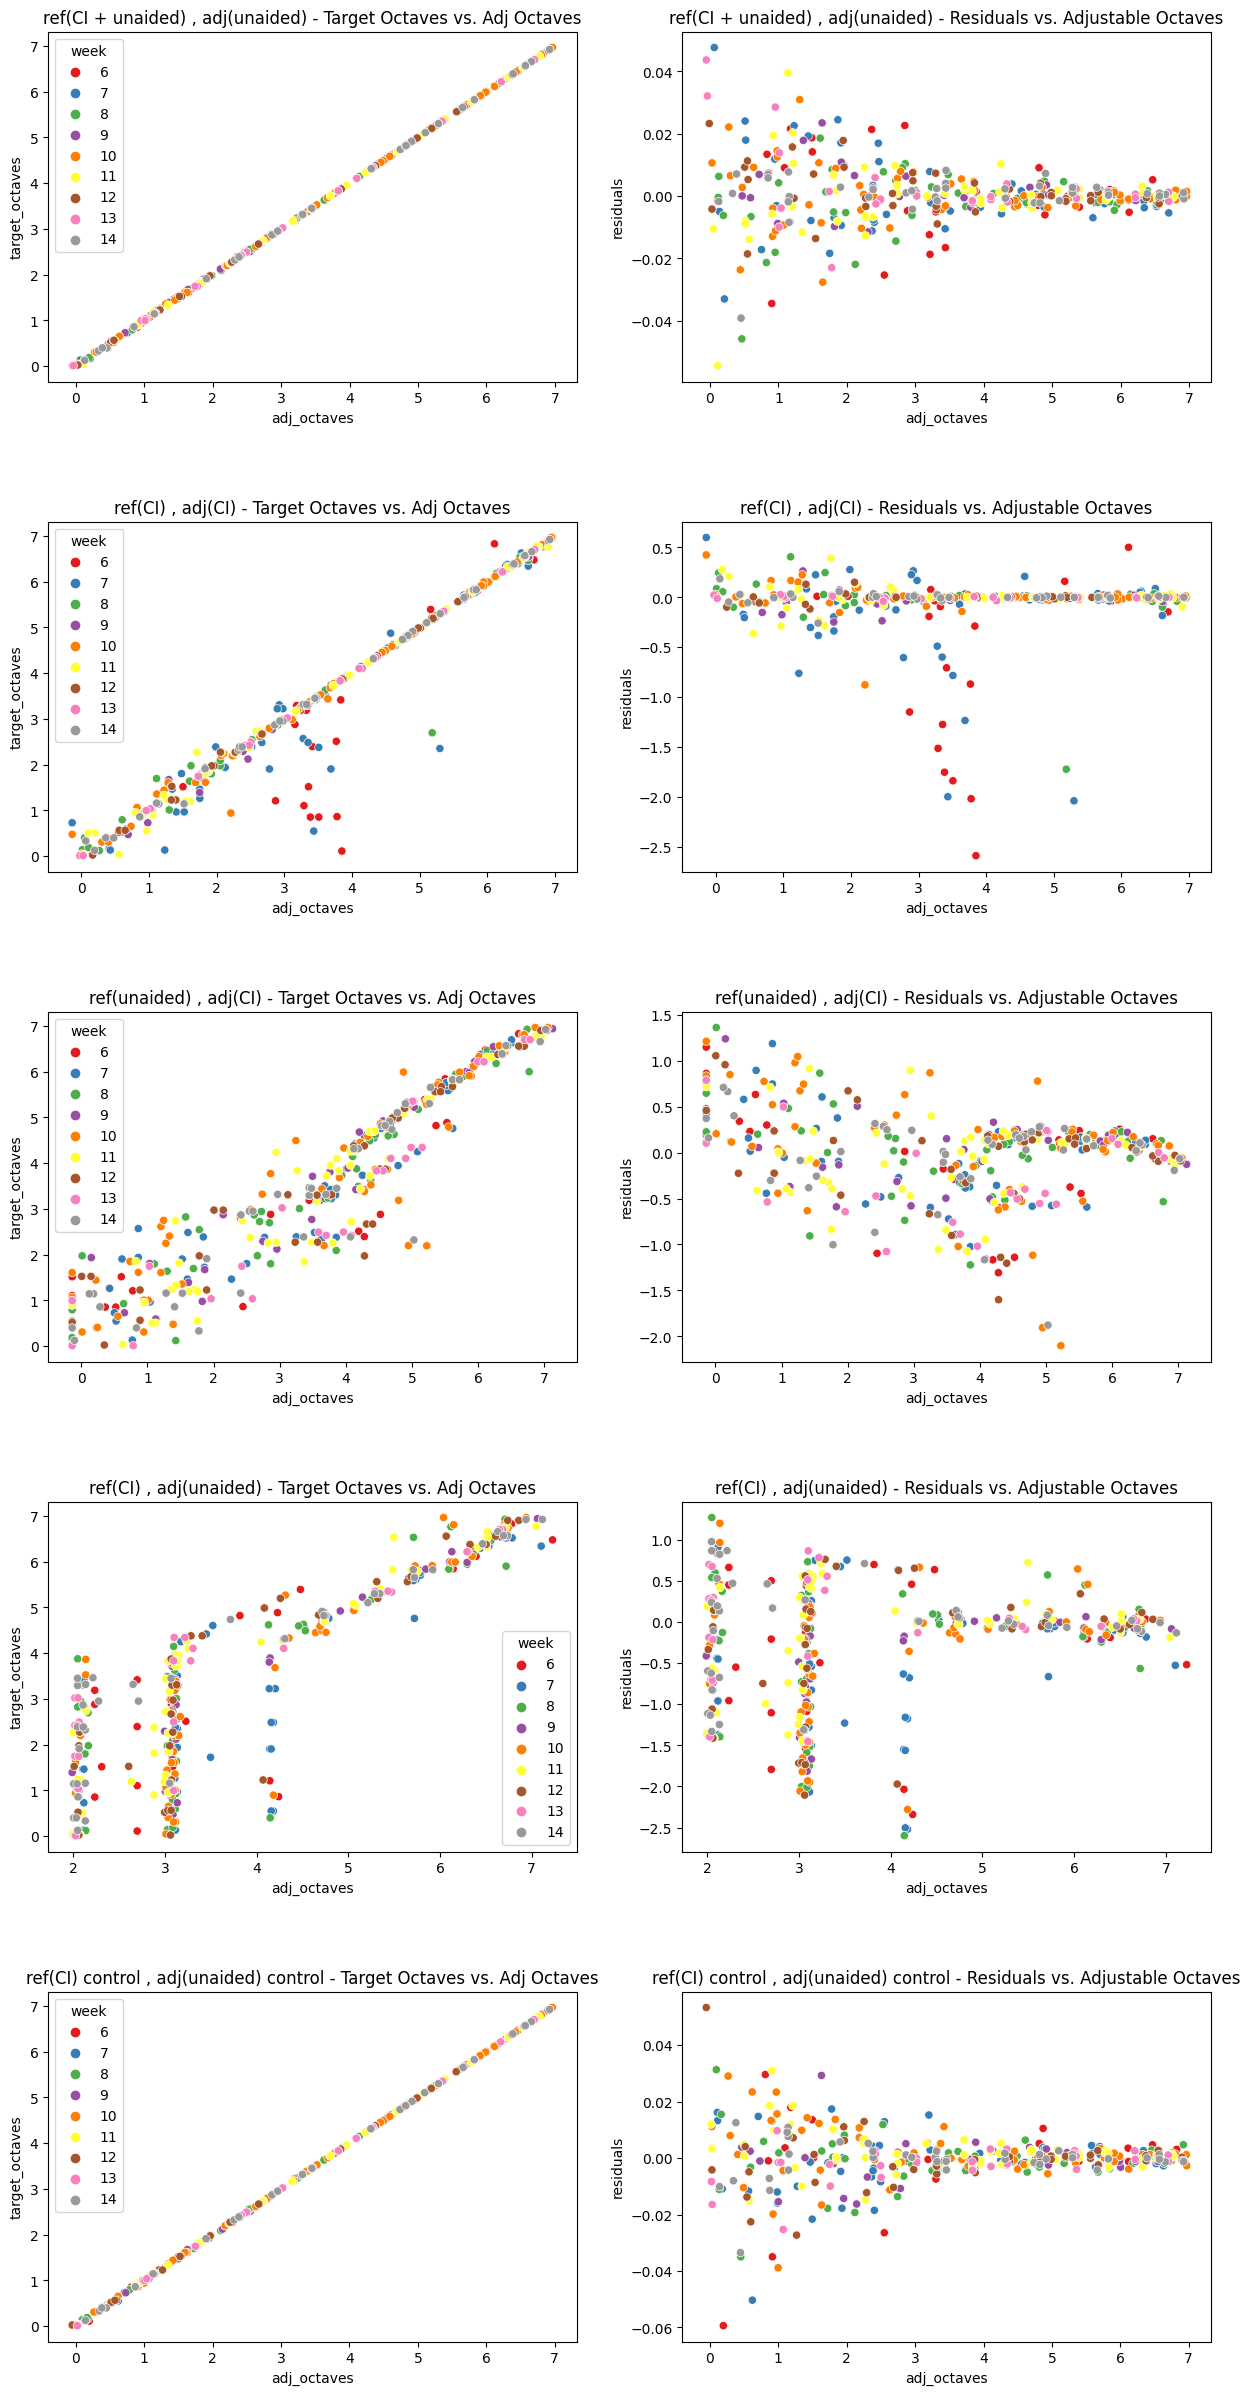

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the 'residuals' column
sorted_df['residuals'] = np.log(sorted_df['Target_Freq'] / sorted_df['Adj_Freq'])

# Define the unique tasks
unique_tasks = sorted_df['Task_Type'].unique()

# Set up the subplots for 5 tasks with 2 plots each
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
fig.subplots_adjust(hspace=0.4)

# Create a custom color palette for weeks
week_palette = sns.color_palette("Set1", len(sorted_df['week'].unique()))

# Create plots for each task
for i, task in enumerate(unique_tasks):
    task_df = sorted_df[sorted_df['Task_Type'] == task]

    # Plot 1: 'target_octaves' vs 'adj_octaves' with custom color palette
    sns.scatterplot(x='adj_octaves', y='target_octaves', hue='week', data=task_df, ax=axes[i, 0], palette=week_palette)
    axes[i, 0].set_title(f"{task} - Target Octaves vs. Adj Octaves")

    sns.scatterplot(x='adj_octaves', y='residuals', hue='week', data=task_df, ax=axes[i, 1], palette=week_palette, legend=False)
    axes[i, 1].set_title(f"{task} - Residuals vs. Adjustable Octaves")


# Display the plots
plt.show()


In [12]:
sorted_df.head(143)

,Task_Type,Target_Freq,Adj_Freq,target_octaves,adj_octaves,week,residuals
0,"ref(CI + unaided) , adj(unaided)",63.568051,62.211720,1.208870,1.177755,6,0.021568
1,"ref(CI) , adj(CI)",1910.177661,1904.849365,6.118131,6.114101,6,0.002793
2,"ref(CI) , adj(CI)",777.383393,788.332825,4.821123,4.841301,6,-0.013987
3,"ref(CI) , adj(CI)",1579.620581,1554.825928,5.844003,5.821178,6,0.015821
4,"ref(CI) , adj(CI)",49.672133,287.067841,0.853005,3.383888,6,-1.754274
...,...,...,...,...,...,...,...
138,"ref(CI) , adj(unaided)",59.050825,178.280182,1.102526,2.696643,6,-1.104958
139,"ref(CI) control , adj(unaided) control",29.681779,31.498028,0.110146,0.195830,6,-0.059392
140,"ref(CI) control , adj(unaided) control",1349.983615,1346.808838,5.617366,5.613970,7,0.002354
141,"ref(CI) control , adj(unaided) control",424.019523,423.316040,3.946627,3.944232,7,0.001660


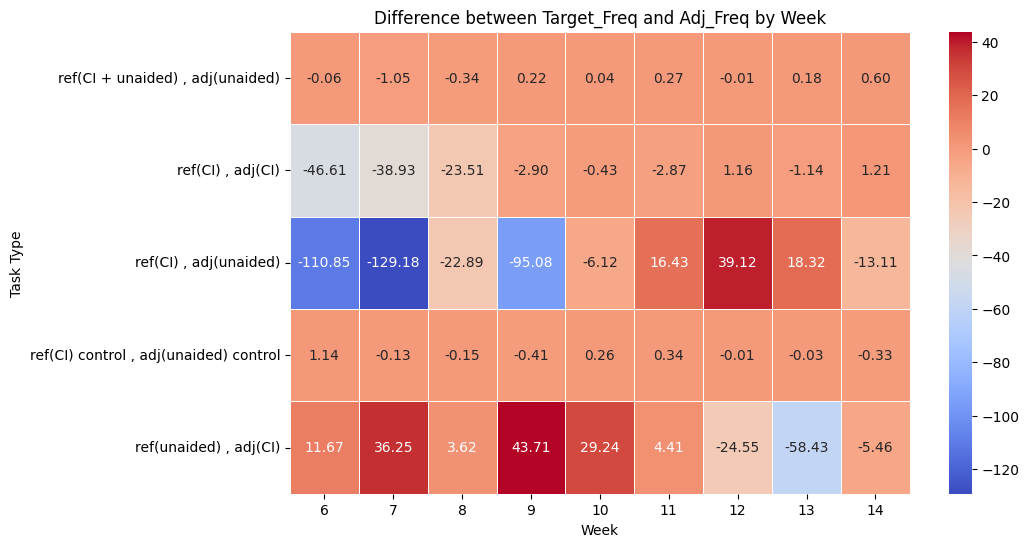

In [13]:

sorted_df['Freq_Difference'] = sorted_df['Target_Freq'] - sorted_df['Adj_Freq']

pivot_table = sorted_df.pivot_table(values='Freq_Difference', index='Task_Type', columns='week')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Difference between Target_Freq and Adj_Freq by Week")
plt.xlabel("Week")
plt.ylabel("Task Type")
plt.show()

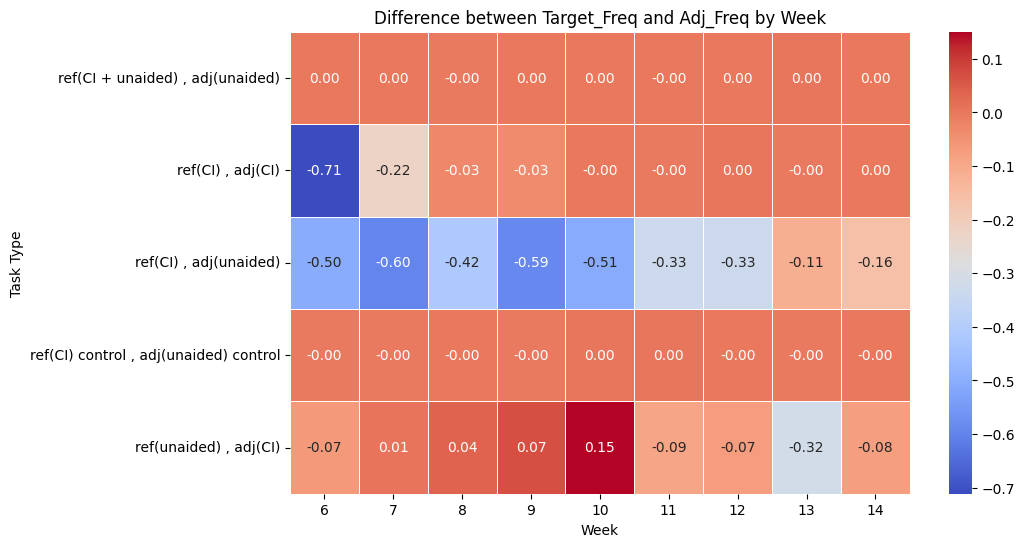

In [14]:
sorted_df['Octave_Difference'] = sorted_df['target_octaves'] - sorted_df['adj_octaves']

pivot_table = sorted_df.pivot_table(values='Octave_Difference', index='Task_Type', columns='week')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Difference between Target_Freq and Adj_Freq by Week")
plt.xlabel("Week")
plt.ylabel("Task Type")
plt.show()

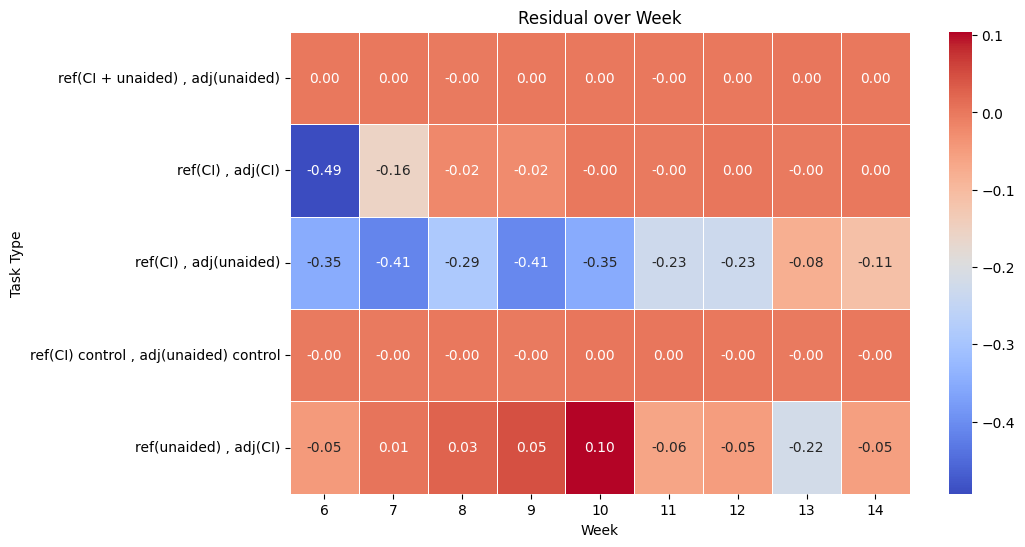

In [39]:

sorted_df['Octave_Difference'] = sorted_df['target_octaves'] - sorted_df['adj_octaves']

pivot_table = sorted_df.pivot_table(values='residuals', index='Task_Type', columns='week')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Residual over Week")
plt.xlabel("Week")
plt.ylabel("Task Type")
plt.show()

In [16]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Task_Type          1960 non-null   object 
 1   Target_Freq        1960 non-null   float64
 2   Adj_Freq           1960 non-null   float64
 3   target_octaves     1960 non-null   float64
 4   adj_octaves        1960 non-null   float64
 5   week               1960 non-null   int64  
 6   residuals          1960 non-null   float64
 7   Freq_Difference    1960 non-null   float64
 8   Octave_Difference  1960 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 137.9+ KB


<ipython-input-17-06e9361d6ef6>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='Freq_Difference', hue='Task_Type', data=sorted_df, ci=None)


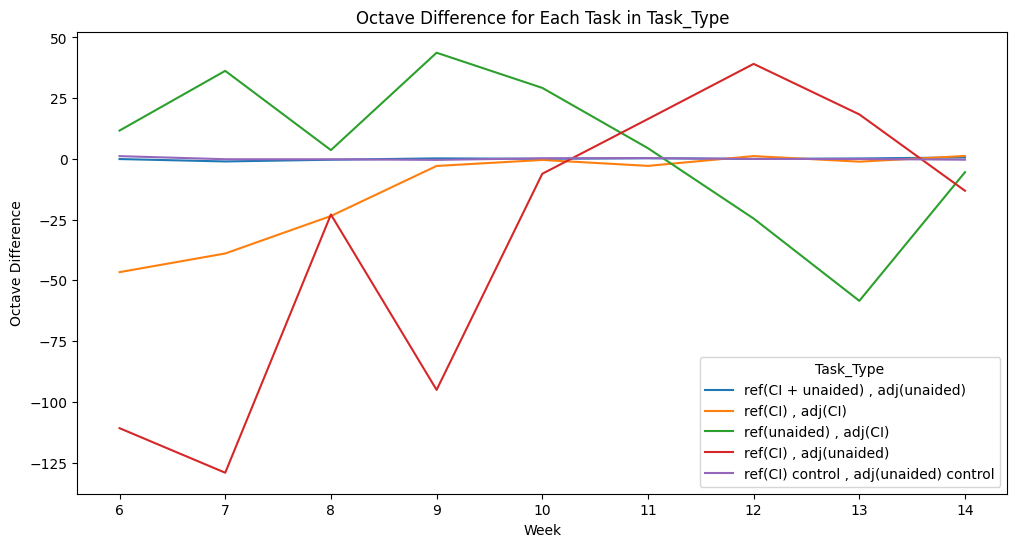

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot a line graph for Octave_Difference for each task in Task_Type without error bands
sns.lineplot(x='week', y='Freq_Difference', hue='Task_Type', data=sorted_df, ci=None)

# Set labels and title
plt.xlabel('Week')
plt.ylabel('Octave Difference')
plt.title('Octave Difference for Each Task in Task_Type')

# Display the legend
plt.legend(title='Task_Type', loc='lower right')

# Show the plot
plt.show()


<ipython-input-18-f57b85b26e6b>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='residuals', hue='Task_Type', data=sorted_df, ci=None)


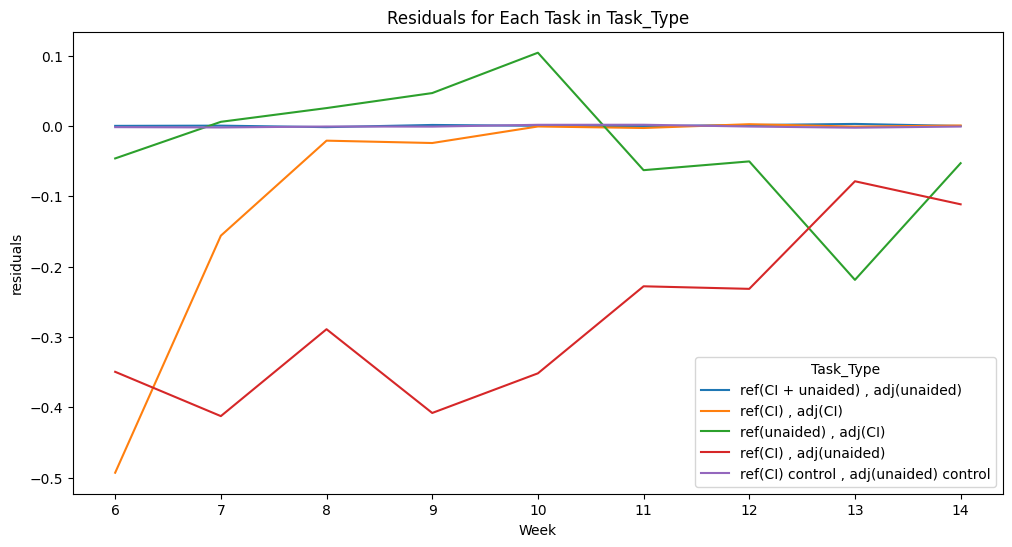

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot a line graph for Octave_Difference for each task in Task_Type without error bands
sns.lineplot(x='week', y='residuals', hue='Task_Type', data=sorted_df, ci=None)

# Set labels and title
plt.xlabel('Week')
plt.ylabel('residuals')
plt.title('Residuals for Each Task in Task_Type')

# Display the legend
plt.legend(title='Task_Type', loc='lower right')

# Show the plot
plt.show()


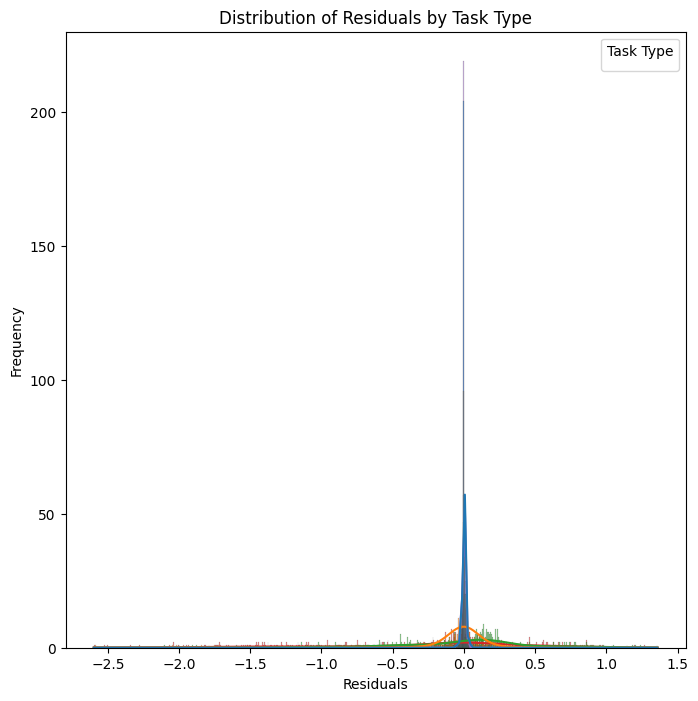

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for 'residuals' for each 'Task_Type'
plt.figure(figsize=(8, 8))
sns.histplot(data=sorted_df, x='residuals', hue='Task_Type', kde=True)
plt.title('Distribution of Residuals by Task Type')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend(title='Task Type')
plt.show()


In [20]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named 'result_df' with a 'Task_Type' column and a 'residuals' column

# # Create a boxplot for 'residuals' for each 'Task_Type'
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=sorted_df, x='Task_Type', y='residuals')
# plt.title('Boxplot of Residuals by Task Type')
# plt.xlabel('Task Type')
# plt.ylabel('Residuals')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()


In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named 'result_df' with a 'Task_Type' column and a 'residuals' column

# # Create a boxplot for 'residuals' for each 'Task_Type'
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=sorted_df, x='week', y='residuals')
# plt.title('Boxplot of Residuals by week')
# plt.xlabel('Task Type')
# plt.ylabel('Residuals')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()


In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named 'result_df' with a 'Task_Type' column and a 'residuals' column

# # Define the unique tasks
# unique_tasks = sorted_df['Task_Type'].unique()

# # Create box plots for each unique 'Task_Type'
# for specific_task in unique_tasks:
#     filtered_df = sorted_df[sorted_df['Task_Type'] == specific_task]

#     # Create a boxplot for 'residuals' for the specific 'Task_Type'
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=filtered_df, x='week', y='residuals')
#     plt.title(f'Boxplot of Residuals for {specific_task}')
#     plt.xlabel('Week')
#     plt.ylabel('Residuals')
#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#     plt.show()


In [23]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame named 'result_df' with a 'Task_Type' column and a 'residuals' column

# # Define the unique tasks
# unique_tasks = sorted_df['Task_Type'].unique()

# # Create box plots for each unique 'Task_Type' with stripplot
# for specific_task in unique_tasks:
#     filtered_df = sorted_df[sorted_df['Task_Type'] == specific_task]

#     # Create a boxplot for 'residuals' for the specific 'Task_Type' with stripplot
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=filtered_df, x='week', y='residuals')

#     # Use stripplot to display data points
#     sns.stripplot(data=filtered_df, x='week', y='residuals', color='red', size=5)

#     # Add a horizontal line at residuals = 0
#     plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)

#     plt.title(f'Boxplot of Residuals for {specific_task}')
#     plt.xlabel('Week')
#     plt.ylabel('Residuals')
#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#     plt.show()


In [24]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Task_Type          1960 non-null   object 
 1   Target_Freq        1960 non-null   float64
 2   Adj_Freq           1960 non-null   float64
 3   target_octaves     1960 non-null   float64
 4   adj_octaves        1960 non-null   float64
 5   week               1960 non-null   int64  
 6   residuals          1960 non-null   float64
 7   Freq_Difference    1960 non-null   float64
 8   Octave_Difference  1960 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 137.9+ KB


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split data into features (X) and target variable (y)
X = sorted_df[['Target_Freq', 'target_octaves', 'week', 'residuals', 'Freq_Difference']]
y = sorted_df['Adj_Freq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 4.2844639400922166e-13


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 4.2844639400922166e-13
Mean Squared Error (MSE): 2.8080086712459648e-25
Root Mean Squared Error (RMSE): 5.299064701667611e-13
R-squared (R2): 1.0


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [28]:
process_df = sorted_df.copy()

X = process_df.drop(['Adj_Freq'], axis=1)
y = process_df['Adj_Freq']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Example: If you have categorical columns in X, you can one-hot encode them.
# X_encoded = pd.get_dummies(X, columns=['Categorical_Column'])


In [29]:
task_df

,Task_Type,Target_Freq,Adj_Freq,target_octaves,adj_octaves,week,residuals
22,"ref(CI) control , adj(unaided) control",777.383393,773.383850,4.821123,4.813681,6,0.005158
23,"ref(CI) control , adj(unaided) control",1579.620581,1578.279907,5.844003,5.842778,6,0.000849
25,"ref(CI) control , adj(unaided) control",250.681344,250.799866,3.188351,3.189033,6,-0.000473
26,"ref(CI) control , adj(unaided) control",202.396822,202.336945,2.879683,2.879256,6,0.000296
27,"ref(CI) control , adj(unaided) control",78.644473,78.640427,1.515914,1.515840,6,0.000051
...,...,...,...,...,...,...,...
1911,"ref(CI) control , adj(unaided) control",1558.225042,1558.634277,5.824328,5.824707,14,-0.000263
1919,"ref(CI) control , adj(unaided) control",60.696744,60.143993,1.142188,1.128989,14,0.009148
1932,"ref(CI) control , adj(unaided) control",36.223849,35.772278,0.397508,0.379410,14,0.012544
1933,"ref(CI) control , adj(unaided) control",3338.840319,3343.187256,6.923772,6.925649,14,-0.001301


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

unique_tasks = sorted_df['Task_Type'].unique()
models = {}  # Dictionary to store models

for task in unique_tasks:
    # Filter data for the specific task
    task_df = sorted_df[sorted_df['Task_Type'] == task]
    X_task = task_df.drop(['Adj_Freq', 'Task_Type', 'adj_octaves', 'target_octaves', 'residuals', 'Freq_Difference'], axis=1)
    y_task = task_df['Adj_Freq']

    # Split the data
    X_train_task, X_test_task, y_train_task, y_test_task = train_test_split(X_task, y_task, test_size=0.2, random_state=42)

    # Create and train a model for each task
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_task, y_train_task)
    models[task] = rf_model

    # Evaluate the model
    y_pred_task = rf_model.predict(X_test_task)
    mae = mean_absolute_error(y_test_task, y_pred_task)
    mse = mean_squared_error(y_test_task, y_pred_task)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_task, y_pred_task)

    print(f'Model for {task}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R2): {r2}')


Model for ref(CI + unaided) , adj(unaided):
Mean Absolute Error (MAE): 5.1967735923091105
Mean Squared Error (MSE): 129.28512160895045
Root Mean Squared Error (RMSE): 11.370361542578602
R-squared (R2): 0.9997876566906868
Model for ref(CI) , adj(CI):
Mean Absolute Error (MAE): 37.86225509848258
Mean Squared Error (MSE): 5833.318067661716
Root Mean Squared Error (RMSE): 76.37616164525235
R-squared (R2): 0.9943119244551188
Model for ref(unaided) , adj(CI):
Mean Absolute Error (MAE): 54.64184013245981
Mean Squared Error (MSE): 29465.856464796794
Root Mean Squared Error (RMSE): 171.65621592239762
R-squared (R2): 0.9651014101281369
Model for ref(CI) , adj(unaided):
Mean Absolute Error (MAE): 64.32110905046234
Mean Squared Error (MSE): 17401.995239612857
Root Mean Squared Error (RMSE): 131.91662230216804
R-squared (R2): 0.9818572177569246
Model for ref(CI) control , adj(unaided) control:
Mean Absolute Error (MAE): 5.492171585710743
Mean Squared Error (MSE): 112.84459325701948
Root Mean Square

In [31]:
import pandas as pd

# Create a dictionary to store the evaluation metrics
evaluation_data = {
    'Task_Type': unique_tasks,
    'Mean Absolute Error (MAE)': [],
    'Mean Squared Error (MSE)': [],
    'Root Mean Squared Error (RMSE)': [],
    'R-squared (R2)': []
}

for task in unique_tasks:
    # Evaluate the model for each task
    y_pred_task = models[task].predict(X_test_task)
    mae = mean_absolute_error(y_test_task, y_pred_task)
    mse = mean_squared_error(y_test_task, y_pred_task)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_task, y_pred_task)

    # Append the metrics to the dictionary
    evaluation_data['Mean Absolute Error (MAE)'].append(mae)
    evaluation_data['Mean Squared Error (MSE)'].append(mse)
    evaluation_data['Root Mean Squared Error (RMSE)'].append(rmse)
    evaluation_data['R-squared (R2)'].append(r2)

# Create a DataFrame from the dictionary
evaluation_df = pd.DataFrame(evaluation_data)

# Display the DataFrame
evaluation_df


,Task_Type,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2)
0,"ref(CI + unaided) , adj(unaided)",4.141856,86.350970,9.292522,0.999900
1,"ref(CI) , adj(CI)",17.952403,4408.571817,66.397077,0.994882
2,"ref(unaided) , adj(CI)",45.638279,5315.512298,72.907560,0.993830
3,"ref(CI) , adj(unaided)",47.819128,4033.559514,63.510310,0.995318
4,"ref(CI) control , adj(unaided) control",5.492172,112.844593,10.622834,0.999869


Mean Absolute Error (MAE): This metric represents the average absolute difference between the predicted and actual values. **Smaller values of MAE indicate better model performance**. For all tasks, the MAE values are relatively small, which means that the models are making accurate predictions.

Mean Squared Error (MSE): This metric is the average of the squared differences between the predicted and actual values. **Smaller MSE values indicate better model performance**. Like MAE, the MSE values for all tasks are relatively small, which is a good sign.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It measures the average magnitude of the errors. **Smaller RMSE values indicate better model performance.** Your RMSE values are also reasonable.

R-squared (R2): R-squared is a measure of how well the model explains the variance in the data. It ranges from 0 to 1, with **1 indicating a perfect fit.** The R2 values are quite high for all tasks, indicating that the models explain most of the variance in the data.

- Based on the above analysis, Ref (CI) , Adj(unaided) performs the worst at
pitch matching. This shows that pitch perceived by the implant user and to try and match the pitch through the unaided ear is difficult. The findings using the random forest algorihtm has aligned the result shown on the visualisation of task 3 where there seem to have a higher residual difference.
  - Task 3 have shown that it is more difficult to predict lower frequencies, more particularly in the octave range 0 to 4.

- However, Ref(CI) , Adj(CI) performed relatively well. This proved that the pitch perceived through CI can be more easily predicted and matched using CI.
  - Using the visualisation of the residuals, it shows that it is more difficult to predict the frequencies in the range of octaves 3 to 4

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load your data
data = sorted_df  # Replace 'your_data.csv' with the actual data file

# Encode 'Task_Type' using one-hot encoding
encoder = OneHotEncoder()
task_type_encoded = encoder.fit_transform(data[['Task_Type']]).toarray()

# Combine encoded 'Task_Type' with other features
features = pd.concat([data[['Adj_Freq', 'week']], pd.DataFrame(task_type_encoded, columns=encoder.get_feature_names_out(['Task_Type']))], axis=1)

# Define the target variable
target = data['Target_Freq']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict 'Target_Freq' on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 71.39708526828159
Mean Squared Error (MSE): 28070.583864184115
Root Mean Squared Error (RMSE): 167.54278219065156
R-squared (R2): 0.9695805940484302


In [33]:
evaluation_df

,Task_Type,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2)
0,"ref(CI + unaided) , adj(unaided)",4.141856,86.350970,9.292522,0.999900
1,"ref(CI) , adj(CI)",17.952403,4408.571817,66.397077,0.994882
2,"ref(unaided) , adj(CI)",45.638279,5315.512298,72.907560,0.993830
3,"ref(CI) , adj(unaided)",47.819128,4033.559514,63.510310,0.995318
4,"ref(CI) control , adj(unaided) control",5.492172,112.844593,10.622834,0.999869


In [34]:
features

,Adj_Freq,week,"Task_Type_ref(CI + unaided) , adj(unaided)","Task_Type_ref(CI) , adj(CI)","Task_Type_ref(CI) , adj(unaided)","Task_Type_ref(CI) control , adj(unaided) control","Task_Type_ref(unaided) , adj(CI)"
0,62.211720,6,1.0,0.0,0.0,0.0,0.0
1,1904.849365,6,0.0,1.0,0.0,0.0,0.0
2,788.332825,6,0.0,1.0,0.0,0.0,0.0
3,1554.825928,6,0.0,1.0,0.0,0.0,0.0
4,287.067841,6,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1955,35.968506,14,1.0,0.0,0.0,0.0,0.0
1956,299.844086,14,1.0,0.0,0.0,0.0,0.0
1957,60.808914,14,1.0,0.0,0.0,0.0,0.0
1958,227.886749,14,0.0,0.0,1.0,0.0,0.0


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Task_Type', 'MAE', 'MSE', 'RMSE', 'R2'])

unique_tasks = sorted_df['Task_Type'].unique()

for task in unique_tasks:
    # Filter data for the specific task
    task_df = sorted_df[sorted_df['Task_Type'] == task]

    # Standardize the 'Target_Freq' and 'Adj_Freq' columns
    scaler = StandardScaler()
    task_df['Target_Freq'] = scaler.fit_transform(task_df['Target_Freq'].values.reshape(-1, 1))
    task_df['Adj_Freq'] = scaler.transform(task_df['Adj_Freq'].values.reshape(-1, 1))

    X_task = task_df.drop(['Adj_Freq', 'Task_Type', 'adj_octaves', 'target_octaves', 'residuals', 'Freq_Difference'], axis=1)
    y_task = task_df['Adj_Freq']

    # Split the data
    X_train_task, X_test_task, y_train_task, y_test_task = train_test_split(X_task, y_task, test_size=0.2, random_state=42)

    # Create and train a model for each task
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_task, y_train_task)

    # Inverse transform for predictions
    y_pred_task = scaler.inverse_transform(rf_model.predict(X_test_task).reshape(-1, 1))

    # Calculate evaluation metrics on the original scale
    mae = mean_absolute_error(task_df.loc[y_test_task.index, 'Adj_Freq'], y_pred_task)
    mse = mean_squared_error(task_df.loc[y_test_task.index, 'Adj_Freq'], y_pred_task)
    rmse = np.sqrt(mse)
    r2 = r2_score(task_df.loc[y_test_task.index, 'Adj_Freq'], y_pred_task)

    # Append the results to the DataFrame
    results_df = results_df.append({'Task_Type': task, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

results_df



<ipython-input-35-b9eb1c6dcc17>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_df['Target_Freq'] = scaler.fit_transform(task_df['Target_Freq'].values.reshape(-1, 1))
<ipython-input-35-b9eb1c6dcc17>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_df['Adj_Freq'] = scaler.transform(task_df['Adj_Freq'].values.reshape(-1, 1))
<ipython-input-35-b9eb1c6dcc17>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

,Task_Type,MAE,MSE,RMSE,R2
0,"ref(CI + unaided) , adj(unaided)",596.657094,9.564841e+05,978.000055,-1.275289e+06
1,"ref(CI) , adj(CI)",1001.032069,2.018427e+06,1420.713500,-1.597731e+06
2,"ref(unaided) , adj(CI)",846.108694,1.477493e+06,1215.521652,-1.420545e+06
3,"ref(CI) , adj(unaided)",867.863293,1.656119e+06,1286.902749,-1.401642e+06
4,"ref(CI) control , adj(unaided) control",727.270202,1.390441e+06,1179.169829,-1.310264e+06


In [36]:
print(unique_tasks)


['ref(CI + unaided) , adj(unaided)' 'ref(CI) , adj(CI)'
 'ref(unaided) , adj(CI)' 'ref(CI) , adj(unaided)'
 'ref(CI) control , adj(unaided) control']


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],  # Test different numbers of trees
    'max_depth': [None, 10, 20],     # Test different tree depths
    'min_samples_split': [2, 5, 10]  # Test different sample splits
}

# Create the grid search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_rf_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = (mse_best ** 0.5)
r2_best = r2_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f'Mean Absolute Error (MAE): {mae_best}')
print(f'Mean Squared Error (MSE): {mse_best}')
print(f'Root Mean Squared Error (RMSE): {rmse_best}')
print(f'R-squared (R2): {r2_best}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Mean Absolute Error (MAE): 70.03684942785175
Mean Squared Error (MSE): 25638.5713180328
Root Mean Squared Error (RMSE): 160.12049000060173
R-squared (R2): 0.9722161066290959
